#### Cleaning and preparing the data for model training

Aim: Understand customer purchase behaviour(purchase amount) against various products of differnt categories

Build a model to predict the purchase amount of customer against the products to create personalized order for customers

In [150]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [151]:
df_train=pd.read_csv('blackfriday_train.csv')

In [152]:
df_train.head(2)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200


In [5]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [70]:
df_test=pd.read_csv('blackfriday_test.csv')
df_test.head(2)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN


In [153]:
## Append test and train data

df=df_train.append(df_test)
df.head(2)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0


In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 77.7+ MB


In [73]:
df.drop(['User_ID'],axis=1,inplace=True)

In [155]:
df.head(2)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0


In [75]:
# handle categorical feature Gender
df.Gender  = df.Gender.map({'F':0,'M':1})
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [156]:
df.Age.unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [157]:
# handle categorical feature Age

df.Age  = df.Age.map({'0-17':1,'18-25':2,'26-35':3,'36-45':4,'46-50':5,'51-55':6,'55+':7})
df.head(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,1,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,1,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,1,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,1,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,7,16,C,4+,0,8,NaN,NaN,7969.0
5,1000003,P00193542,M,3,15,A,3,0,1,2.0,NaN,15227.0
6,1000004,P00184942,M,5,7,B,2,1,1,8.0,17.0,19215.0
7,1000004,P00346142,M,5,7,B,2,1,1,15.0,NaN,15854.0
8,1000004,P0097242,M,5,7,B,2,1,1,16.0,NaN,15686.0
9,1000005,P00274942,M,3,20,A,1,1,8,NaN,NaN,7871.0


In [158]:
#fixing categorical city categories

df.City_Category.unique()

array(['A', 'C', 'B'], dtype=object)

In [159]:
df_city=pd.get_dummies(df['City_Category'],drop_first=True)

In [160]:
df_city.head(3)

,B,C
0,0,0
1,0,0
2,0,0


In [161]:
df=pd.concat([df,df_city],axis=1)
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,1000001,P00069042,F,1,10,A,2,0,3,NaN,NaN,8370.0,0,0
1,1000001,P00248942,F,1,10,A,2,0,1,6.0,14.0,15200.0,0,0
2,1000001,P00087842,F,1,10,A,2,0,12,NaN,NaN,1422.0,0,0
3,1000001,P00085442,F,1,10,A,2,0,12,14.0,NaN,1057.0,0,0
4,1000002,P00285442,M,7,16,C,4+,0,8,NaN,NaN,7969.0,0,1


In [162]:
df.drop('City_Category',axis=1,inplace=True)

In [163]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,1000001,P00069042,F,1,10,2,0,3,NaN,NaN,8370.0,0,0
1,1000001,P00248942,F,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,1000001,P00087842,F,1,10,2,0,12,NaN,NaN,1422.0,0,0
3,1000001,P00085442,F,1,10,2,0,12,14.0,NaN,1057.0,0,0
4,1000002,P00285442,M,7,16,4+,0,8,NaN,NaN,7969.0,0,1


In [164]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
B                                  0
C                                  0
dtype: int64

In [165]:
# Focus on replacing themissing values

df.Product_Category_2.unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [166]:
df.Product_Category_2.value_counts()

8.0     91317
14.0    78834
2.0     70498
16.0    61687
15.0    54114
5.0     37165
4.0     36705
6.0     23575
11.0    20230
17.0    19104
13.0    15054
9.0      8177
12.0     7801
10.0     4420
3.0      4123
18.0     4027
7.0       854
Name: Product_Category_2, dtype: int64

In [167]:
#Replace missing category with mode

df.Product_Category_2 = df.Product_Category_2.fillna(df.Product_Category_2.mode()[0])
df.Product_Category_3 = df.Product_Category_3.fillna(df.Product_Category_3.mode()[0])

In [168]:
df.Product_Category_2

0          8.0
1          6.0
2          8.0
3         14.0
4          8.0
          ... 
233594     8.0
233595     8.0
233596     5.0
233597    16.0
233598     5.0
Name: Product_Category_2, Length: 783667, dtype: float64

In [169]:
df.head(30)

,User_ID,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,1000001,P00069042,F,1,10,2,0,3,8.0,16.0,8370.0,0,0
1,1000001,P00248942,F,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,1000001,P00087842,F,1,10,2,0,12,8.0,16.0,1422.0,0,0
3,1000001,P00085442,F,1,10,2,0,12,14.0,16.0,1057.0,0,0
4,1000002,P00285442,M,7,16,4+,0,8,8.0,16.0,7969.0,0,1
5,1000003,P00193542,M,3,15,3,0,1,2.0,16.0,15227.0,0,0
6,1000004,P00184942,M,5,7,2,1,1,8.0,17.0,19215.0,1,0
7,1000004,P00346142,M,5,7,2,1,1,15.0,16.0,15854.0,1,0
8,1000004,P0097242,M,5,7,2,1,1,16.0,16.0,15686.0,1,0
9,1000005,P00274942,M,3,20,1,1,8,8.0,16.0,7871.0,0,0


In [170]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [171]:
df.Stay_In_Current_City_Years = df.Stay_In_Current_City_Years.replace({'4+':4})


In [172]:
df.head(10)

,User_ID,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,1000001,P00069042,F,1,10,2,0,3,8.0,16.0,8370.0,0,0
1,1000001,P00248942,F,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,1000001,P00087842,F,1,10,2,0,12,8.0,16.0,1422.0,0,0
3,1000001,P00085442,F,1,10,2,0,12,14.0,16.0,1057.0,0,0
4,1000002,P00285442,M,7,16,4,0,8,8.0,16.0,7969.0,0,1
5,1000003,P00193542,M,3,15,3,0,1,2.0,16.0,15227.0,0,0
6,1000004,P00184942,M,5,7,2,1,1,8.0,17.0,19215.0,1,0
7,1000004,P00346142,M,5,7,2,1,1,15.0,16.0,15854.0,1,0
8,1000004,P0097242,M,5,7,2,1,1,16.0,16.0,15686.0,1,0
9,1000005,P00274942,M,3,20,1,1,8,8.0,16.0,7871.0,0,0


In [173]:
# Convert object into integers

df.Stay_In_Current_City_Years = df.Stay_In_Current_City_Years.astype(int)

In [174]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 13 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  int64  
 4   Occupation                  783667 non-null  int64  
 5   Stay_In_Current_City_Years  783667 non-null  int32  
 6   Marital_Status              783667 non-null  int64  
 7   Product_Category_1          783667 non-null  int64  
 8   Product_Category_2          783667 non-null  float64
 9   Product_Category_3          783667 non-null  float64
 10  Purchase                    550068 non-null  float64
 11  B                           783667 non-null  uint8  
 12  C                           783667 non-null  uint8  
dtypes: float64(3),

In [135]:
df['B']=df['B'].astype(int)
df['C']=df['C'].astype(int)

In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  int32  
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  B                           783667 non-null  int32  
 11  C                           783667 non-null  int32  
dtypes: float64(3), int32(3), int64(5), object(1)
memory usage: 68.8+ MB


C:\Users\saras\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='Purchase'>

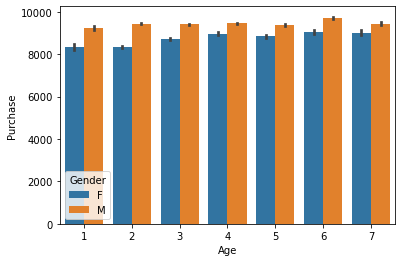

In [175]:
#visulaization of age vs purchase
sns.barplot('Age','Purchase',hue='Gender',data=df)

#observations

Purchase done by men more than women

C:\Users\saras\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Occupation', ylabel='Purchase'>

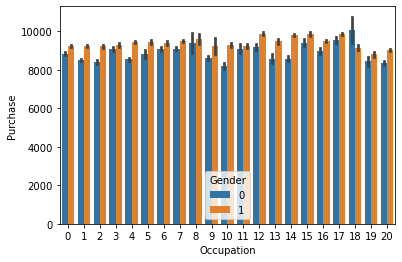

In [139]:
#visulaization of Occupation vs purchase
sns.barplot('Occupation','Purchase',hue='Gender',data=df)

C:\Users\saras\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Product_Category_1', ylabel='Purchase'>

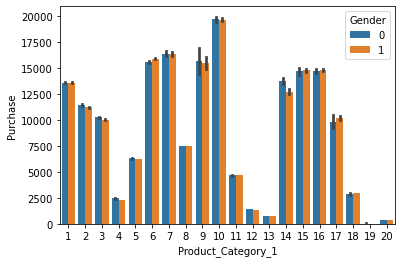

In [141]:
#visulaization of Product Category vs purchase
sns.barplot('Product_Category_1','Purchase',hue='Gender',data=df)

C:\Users\saras\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Product_Category_2', ylabel='Purchase'>

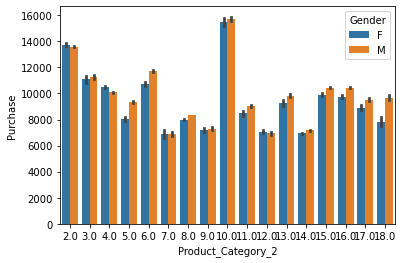

In [176]:
sns.barplot('Product_Category_2','Purchase',hue='Gender',data=df)

C:\Users\saras\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Product_Category_3', ylabel='Purchase'>

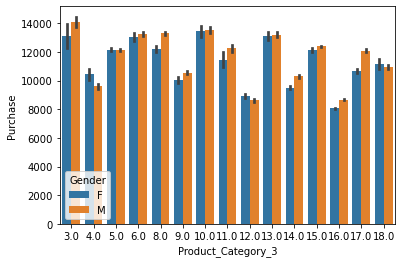

In [177]:
sns.barplot('Product_Category_3','Purchase',hue='Gender',data=df)